# Copier Maintenance

In this problem, an office equipment company sells a specific copier and also provides maintenance services on it.  The data provided were collected from 45 calls for maintenance from recent users.  We have the number of copiers serviced as the explanatory variable $X$ and the number of minutes spent by the technician to address the issues in the copiers as the response $Y$.  We shall first import the data from the text file.  In the text file, the response is in the first column, followed by the predictor.

In [232]:
import pandas as pd

copiers = pd.read_csv("CH01PR20.txt", header=None, delimiter="    ", engine='python')
copiers.columns = ["time", "n_copiers"]
copiers.head()

,time,n_copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1


### Regression model

To obtain the estimated regression model that fits the data, we'll use SciKit-Learn's "LinearRegression" class.

In [233]:
from sklearn.linear_model import LinearRegression

X = copiers[["n_copiers"]]
y = copiers["time"]

copier_reg = LinearRegression().fit(X, y)

To access the regression model's coefficients, we use the following:

In [294]:
print(f"Coefficient:  {copier_reg.coef_[0]}")  # [0] to get coef out of list
print(f"Intercept:    {copier_reg.intercept_}")

Coefficient:  15.035248041775457
Intercept:    -0.5801566579634425


Therefore, the estimated regression model for the number of service minutes given the number of copiers is approximately 
$$\begin{equation}
\hat{Y} = -0.5802 + 15.0352 X\quad\quad (1.1)
\end{equation}$$

### Plotting the Regression Function

Here, we shall superimpose the regression function onto the copier maintenance scatterplot.  We could use Seaborn's 'regplot' here, but the way we demonstrate here verify the coefficients provided by our fitted LinearRegression() object provide a line that fits well.

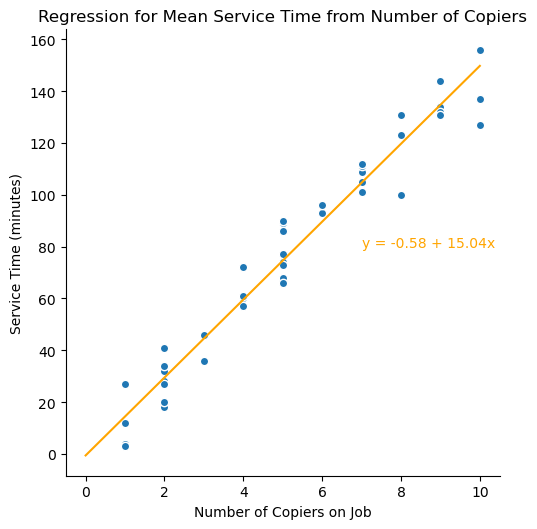

In [300]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

b0 = copier_reg.intercept_
b1 = copier_reg.coef_[0]

lin_x = np.linspace(0, 10, 100)
lin_y = b0 + b1*lin_x

grid = sns.FacetGrid(data=copiers, height=5)
grid = grid.map(plt.scatter, data=copiers, x="n_copiers", y="time", edgecolor='w')
plt.plot(lin_x, lin_y, color='orange')
plt.title("Regression for Mean Service Time from Number of Copiers")
plt.ylabel("Service Time (minutes)")
plt.xlabel("Number of Copiers on Job")
plt.text(7, 80, f"y = {b0:.2f} + {b1:.2f}x", color='orange')
plt.show()

We can see the linear regression plot appears to provide an adequate fit to the data.

### Interpretation of the Coefficients

In Equation 1.1, we see our linear regression's intercept is $b_0  =-0.5802$.  This means we would expect a mean service time of -0.5802 minutes for a call where 0 copiers are serviced.  This doesn't make since given the circumstances, thus we only use this coefficient as a means of fitting the regression line.  We interpret the coefficient $b_1 = 15.0352$ to mean that the mean number of minutes of service time on a call increases by a little over 15 minutes per additional copier on the call.

### Point Estimate

Suppose we want to know how many service minutes we should expect to see on a call concerning 5 copiers.  To find this, we simply calculate the value of the regression at this level of copiers:

In [317]:
def f_reg(x_h):
    '''
    This function will be used for calculating regression for specific levels
    of X.  Simpler than copier_reg.predict() since this can take raw integer
    '''
    return b0 + b1*x_h

print(f"Expected service minutes for 5 copiers: {f_reg(5):.4f} minutes")

Expected service minutes for 5 copiers: 74.5961 minutes


Therefore, we should expect $\hat{Y}_h = -0.5802 + 15.0352\cdot 5 = 74.5961$ minutes of service time on a call with 5 copiers.

### Checking Residuals

Here, we will calculate the residuals $e_i = Y_i - \hat{Y}_i$.  We will add columns for $\hat{Y}_i$ and $e_i$ to our `copiers` dataframe.

In [313]:
copiers['y_hat'] = copier_reg.predict(copiers[['n_copiers']])
copiers['residual'] = copiers['time'] - copiers['y_hat']
copiers['res_sq'] = copiers['residual']**2
copiers.head()

,time,n_copiers,y_hat,residual,res_sq,x-x_bar,x-x_bar_sq,y_hat-y_bar,y - y_hat,y - y_bar,res_rank,exp_normal_value,avg_copier_age,serv_exp
0,20,2,29.490339,-9.490339,90.066542,-3.111111,9.679012,-46.776327,-9.490339,-56.266667,7.5,-8.957700,20,4
1,60,4,59.560836,0.439164,0.192865,-1.111111,1.234568,-16.705831,0.439164,-16.266667,24.0,0.494017,19,5
2,46,3,44.525587,1.474413,2.173892,-2.111111,4.456790,-31.741079,1.474413,-30.266667,26.0,1.488179,27,4
3,41,2,29.490339,11.509661,132.472287,-3.111111,9.679012,-46.776327,11.509661,-35.266667,41.0,11.311771,32,1
4,12,1,14.455091,-2.455091,6.027474,-4.111111,16.901235,-61.811575,-2.455091,-64.266667,18.0,-2.501266,24,4


In [308]:
print(f"Sum of residuals: {sum(copiers['residual']):.6f}")

Sum of residuals: -0.0000000000


Ignoring roundoff error, we see that the relation $\sum_i e_i = 0$ holds.

We can verify another property of the regression:

In [310]:
print(f"Sum of response values:  {sum(copiers['time']):.10f}")
print(f"Sum of predicted vals :  {sum(copiers['y_hat']):.10f}")

Sum of response values:  3432.0000000000
Sum of predicted vals :  3432.0000000000


This shows us that $\sum_i Y_i = \sum_i \hat{Y}_i$, ignoring rounding error.

### Estimation of Variance

With the column for $e_i^2$, we can obtain an estimation for the variance and standard deviation for the service times.

In [318]:
copier_sse = sum(copiers['res_sq'])  # SSE
n = copiers.shape[0]                 # number of instances in dataframe
sse_df = n - 2                       # SSE degrees of freedom
copier_mse = copier_sse / sse_df     # MSE for data
print(f"Mean Square Error (MSE) for copier data:  {copier_mse}")
print(f"Estimate for standard deviation        :  {copier_mse**(1/2)}")

Mean Square Error (MSE) for copier data:  79.45062845345802
Estimate for standard deviation        :  8.913508201233565


These results give us estimates of the variance and standard deviation we're looking for: $$s^2 = MSE = \frac{\sum e_i^2}{n-2} = 3416.377/43 = 79.4506$$
$$s = \sqrt{MSE} = 8.914$$

### Confidence Interval for $\beta_1$

We found earlier that an estimate for $\beta_1$ is $b_1 = 15.0352$.  Suppose we want a 90% confidence interval for $\beta_1$.  We can calculate this interval with the following:

In [241]:
from scipy.stats import t

copiers['x-x_bar'] = copiers['n_copiers']-np.mean(copiers['n_copiers'])
copiers['x-x_bar_sq'] = copiers['x-x_bar']**2

alpha = 0.1
quantile = t.ppf(1-alpha/2, 43)

s2_b1 = copier_mse / sum(copiers['x-x_bar_sq'])
s_b1 = s2_b1**(1/2)

margin_error = quantile * s_b1
print(margin_error)

0.8121037611460029


This give us the interval

In [320]:
lower_limit = b1 - margin_error
upper_limit = b1 + margin_error
print(f"90% Confidence Interval for B1:  [{lower_limit}, {upper_limit}]")

90% Confidence Interval for B1:  [14.223144280629453, 15.84735180292146]


Therefore, we are 90% confident that the mean service time increases between 14.2231 and 15.8474 minutes per copier.

### Test for Linear Relationship

We can perform a test to test the hypothesis $$\begin{align}
H_0:&\quad \beta_1 = 0\\
H_A:&\quad \beta_1 \neq 0 .
\end{align}$$
We'll use the knowledge that $$\frac{\hat{\beta}_1 - \beta_1}{s(\beta_1)} \sim t_{(n-2)}$$

In [243]:
t_star = (b_1 - 0) / s_b1
print(t_star)

[31.12325812]


In [244]:
print(t.ppf(0.1/2, 43))
print(t.ppf(1-0.1/2, 43)) # critical value since t_star > 0

-1.6810707018477637
1.681070701847763


In [245]:
print(1 - t.cdf(t_star, 43)) # p-value

[0.]


From above, we have a test statistic of $t^* = 31.123$ and critical value of 1.6811.  Since $|t^*| > 1.6811$, we reject the null hypothesis and conclude there is a linear relationship between the number of copiers on a service call and the number of minutes spent servicing the call.  Our $p$-value is quite small, which also suggests to reject our null hypothesis.  Our previous confidence interval appears to agree with our hypothesis test since $\beta_1 = 0$ does not lie in the confidence interval.

Suppose the manufacturer suggests that the number of minutes spent servicing a call shouldn't exceed 14 minutes per additional copier.  We can then set up the hypotheses $$\begin{align}
H_0:&\quad \beta_1 \leq 14\\
H_A:&\quad \beta_1 > 14.
\end{align}$$
We can test that too:

In [246]:
t_star_2 = (b_1 - 14) / s_b1
print(t_star_2)

[2.14298374]


In [247]:
print(t.ppf(1-0.05, 43))
print(1 - t.cdf(t_star_2, 43))

1.681070701847763
[0.01890766]


Since $t^* = 2.1430$ is greater than our critical value at the $\alpha = 0.05$ significance level, we reject our null hypothesis and conclude the number of minutes spent servicing a call should increase over 14 minutes per copier.  The $p$-value of 0.0189 also suggests this at our significance level.

### Confidence/Prediction Intervals for Specific Level $X_h$

Here, we will calculate 90% confidence and prediction intervals for the mean number of minutes for a call concerning a given number of copiers.  The  $1-\alpha$ confidence interval can be calculated with $$\hat{Y}_h \pm t_{(1-\alpha/2;\, n-2)} s(\hat{Y}_h)$$ where  $$s^2(\hat{Y}_h) = MSE \left[ \frac{1}{n} + \frac{(X_h-\bar{X})^2}{\sum (X_i - \bar{X})^2}\right]$$  Below, we define the function to calculate $s^2(\hat{Y}_h)$:

In [248]:
def sample_variance_Y_h(x_h):
    #  This function will allow us to calculate the sample variance of a predicted service time for a given number of copiers
    return copier_mse * (1/45 + ((x_h - np.mean(copiers['n_copiers']))**2)/(sum(copiers['x-x_bar_sq'])))

The $1-\alpha$ prediction interval is similar to the confidence interval with some changes: $$\hat{Y}_h \pm t_{(1-\alpha /2;\, n-2)}s(pred)$$ where we find the appropriate value from a $t$-distribution and $$s^2(pred) = MSE + s^2(\hat{Y}_h)$$ We now define the function to calculate $s^2(pred)$:

In [249]:
def sample_variance_pred(x_h):
    return copier_mse + sample_variance_Y_h(x_h)

Now we'll compare the confidence and prediction intervals for $X_h = 6$.  Both will assume risk of $\alpha = 0.1$.

In [250]:
lower_ci =  b_0 + b_1*6 - t.ppf(1-0.1/2, 43) * sample_variance_Y_h(6)**(1/2)
upper_ci =  b_0 + b_1*6 + t.ppf(1-0.1/2, 43) * sample_variance_Y_h(6)**(1/2)

lower_pi = b_0 + b_1*6 - t.ppf(1-0.1/2, 43) * sample_variance_pred(6)**(1/2)
upper_pi = b_0 + b_1*6 + t.ppf(1-0.1/2, 43) * sample_variance_pred(6)**(1/2)

lower_cmi = lower_ci/6
upper_cmi = upper_ci/6

print(f"Y_hat confidence interval for X_h = 6:  [{lower_ci}, {upper_ci}]")
print(f"CI for expected service time / copier:  [{lower_cmi}, {upper_cmi}]")
print(f"Y_hat prediction interval for X_h = 6:  [{lower_pi}, {upper_pi}]")

Y_hat confidence interval for X_h = 6:  [[87.28386626], [91.97879693]]
CI for expected service time / copier:  [[14.54731104], [15.32979949]]
Y_hat prediction interval for X_h = 6:  [[74.46432904], [104.79833415]]


Therefore, we are 90% confident that the mean service time for a call concerning 6 copiers is between 87.2839 and 91.9788 minutes.  We estimate the service time per copier on such a call will be between 14.5473 and 15.3298 minutes.  We predict with 90% confidence that the next job servicing 6 copiers will take somewhere between 74.4643 and 104.7983 minutes.  The prediction interval is wider due to the added uncertainty in predicting a specific call's service time rather than a mean.  Mathematically, this wider interval comes from the added MSE term in the prediction variance.

### Confidence and Prediction Bands

We shall implement a 90% confidence band on the regression line plotted earlier, notably the Working-Hotelling confidence band.  The limits of a Working-Hotelling $1-\alpha$ band are $$\hat{Y}_h \pm Ws(\hat{Y}_h)$$ where $$W^2 = 2F_{(1-\alpha;\, 2,\, n-2)}$$

We now use the above function to manually plot the Working-Hotelling 90% confidence bands

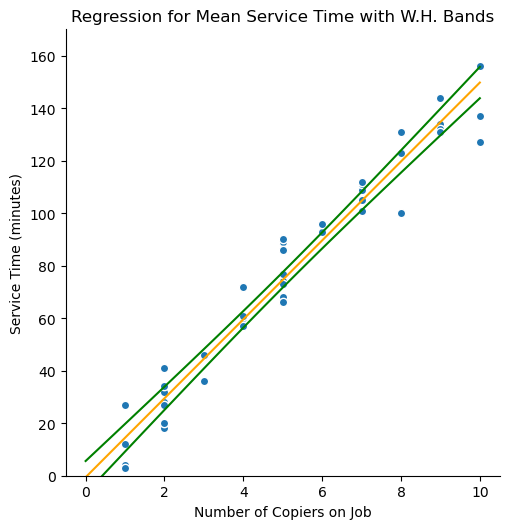

In [251]:
from scipy.stats import f

w = (2 * f.ppf(1 - 0.1, 2, 43))**(1/2)

ci_x = np.linspace(0, 10, 100)
ci_y = b_0 + b_1*ci_x
upper_ci_y = ci_y + w * sample_variance_Y_h(ci_x)**(1/2)
lower_ci_y = ci_y - w * sample_variance_Y_h(ci_x)**(1/2)
#print(upper_ci_y)

grid_ci = sns.FacetGrid(data=copiers, height=5, ylim=(0,170))
grid_ci = grid_ci.map(plt.scatter, data=copiers, x="n_copiers", y="time", edgecolor='w')
plt.plot(lin_x, lin_y, color='orange')
plt.plot(ci_x, upper_ci_y, color='green')
plt.plot(ci_x, lower_ci_y, color='green')
plt.title("Regression for Mean Service Time with W.H. Bands")
plt.ylabel("Service Time (minutes)")
plt.xlabel("Number of Copiers on Job")
plt.show()

In [252]:
upper_ci_y = b_0 + b_1*6 + w * sample_variance_Y_h(6)**(1/2)
lower_ci_y = b_0 + b_1*6 - w * sample_variance_Y_h(6)**(1/2)
print(f"W.H. 90% confidence band limits at X_h = 6: [{lower_ci_y[0], upper_ci_y[0]}]")

W.H. 90% confidence band limits at X_h = 6: [(86.55262909794367, 92.71003408743492)]


Using our previous investigation, the Working-Hotelling 90% confidence band limits at $X_h = 6$ are 86.5526 and 92.7100 minutes.  This interval is wider than the original confidence interval due to the $W$ factor.  The Working-Hotelling bands have to encompass the regression at every point, not at just a single level of the predictor.

### Analysis of Variance

Here, we shall create basic and modified ANOVA tables (using Pandas DataFrames) for analyzing the effect of the number of copiers on service time.  We shall first add some useful columns to the `copiers` dataframe.

In [253]:
copiers["y_hat-y_bar"] = copiers["y_hat"] - np.mean(copiers["time"])
copiers["y - y_hat"] = copiers["time"] - copiers["y_hat"]
copiers["y - y_bar"] = copiers["time"] - np.mean(copiers["time"])
copiers.head()

,time,n_copiers,y_hat,residual,res_sq,x-x_bar,x-x_bar_sq,y_hat-y_bar,y - y_hat,y - y_bar
0,20,2,29.490339,-9.490339,90.066542,-3.111111,9.679012,-46.776327,-9.490339,-56.266667
1,60,4,59.560836,0.439164,0.192865,-1.111111,1.234568,-16.705831,0.439164,-16.266667
2,46,3,44.525587,1.474413,2.173892,-2.111111,4.456790,-31.741079,1.474413,-30.266667
3,41,2,29.490339,11.509661,132.472287,-3.111111,9.679012,-46.776327,11.509661,-35.266667
4,12,1,14.455091,-2.455091,6.027474,-4.111111,16.901235,-61.811575,-2.455091,-64.266667


In [254]:
ss_reg = sum(copiers["y_hat-y_bar"]**2)
ss_err = sum(copiers["y - y_hat"]**2)
ss_tot = sum(copiers["y - y_bar"]**2)
df_reg = 1
df_err = copiers.shape[0] - 2
df_tot = df_reg + df_err
ms_reg = ss_reg / df_reg
ms_err = ss_err / df_err
f_basic = ms_reg / ms_err
p_basic = 1 - f.cdf(f_basic, 1, 43)

anova_basic = pd.DataFrame({"Source":["Regression", "Error", "Total"], 
                            "SS":[ss_reg, ss_err, ss_tot],
                            "df":[df_reg, df_err, df_tot], 
                            "MS":[ms_reg, ms_err, ''],
                            "F": [f_basic,'',''],
                            "P(>F)":[p_basic,'','']})
anova_basic = anova_basic.set_index("Source")
anova_basic.head()

,SS,df,MS,F,P(>F)
Source,,,,,
Regression,76960.422977,1,76960.422977,968.657196,0.0
Error,3416.377023,43,79.450628,,
Total,80376.800000,44,,,


A modified ANOVA table can be constructed as follows:

In [255]:
ss_correction = copiers.shape[0] * np.mean(copiers.time)**2
df_correction = 1
ss_uncorrected = sum(copiers.time**2)
df_uncorrected = df_reg + df_err + df_correction

anova_mod = pd.DataFrame({"Source":["Regression", "Error", "Total", "Correction for mean", "Total, uncorrected"], 
                            "SS":[ss_reg, ss_err, ss_tot, ss_correction, ss_uncorrected],
                            "df":[df_reg, df_err, df_tot, df_correction, df_uncorrected], 
                            "MS":[ms_reg, ms_err, '', '', ''],
                            "F": [f_basic,'','','',''],
                            "P(>F)":[p_basic,'','','','']})
anova_mod = anova_mod.set_index("Source")

anova_mod.head(10)

,SS,df,MS,F,P(>F)
Source,,,,,
Regression,76960.422977,1,76960.422977,968.657196,0.0
Error,3416.377023,43,79.450628,,
Total,80376.800000,44,,,
Correction for mean,261747.200000,1,,,
"Total, uncorrected",342124.000000,45,,,


These tables can be used to test the hypotheses $$\begin{align}
H_0:&\quad \beta_1 = 0\\
H_A:&\quad \beta_1 \neq 0
\end{align}$$ Our $F$-statistic is 968.6572.  The $p$-value is quite small (it even shows as 0 in the table, which suggests we reject the null hypothesis and conclude there is statistically significant evidence (at $\alpha = 0.1$) to suggest $\beta_1 \neq 0$ in our regression model.

The reduction in the total variation of minutes spent on a call reduced when the number of the copiers serviced is introduced into the analysis is the correlation of determination $R^2$.  We calculate it with the following formula: $$ R^2 = \frac{SS_{Regression}}{SS_{Total}}$$.

In [256]:
coef_det = ss_reg / ss_tot
coef_cor = coef_det**(1/2) * (b_1 / abs(b_1))
print(coef_det)
print(coef_cor)

0.95749548347908
[0.97851698]


We find about a 96% reduction in the variation of the number of service minutes with the introduction of the number of copiers into the analysis, which is quite large.  The coefficient of correlation, a measure of the strength of the linear association, is $r = +\sqrt{R^2} = 0.9785$ (+ since $b_1 > 0)$, which is highly positive.

### Diagnostic Plots

<Axes: ylabel='n_copiers'>

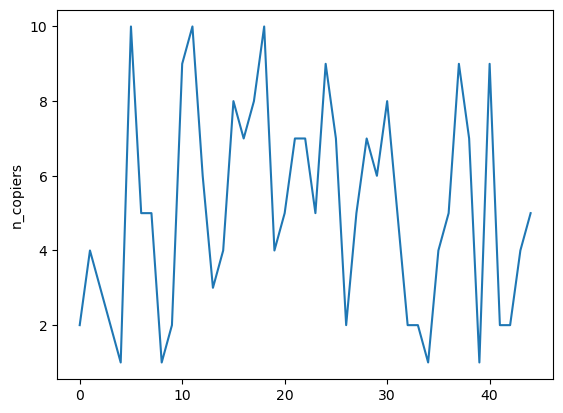

In [257]:
sns.lineplot(data=copiers, x=copiers.index, y="n_copiers")

In [258]:
copiers.head()

,time,n_copiers,y_hat,residual,res_sq,x-x_bar,x-x_bar_sq,y_hat-y_bar,y - y_hat,y - y_bar
0,20,2,29.490339,-9.490339,90.066542,-3.111111,9.679012,-46.776327,-9.490339,-56.266667
1,60,4,59.560836,0.439164,0.192865,-1.111111,1.234568,-16.705831,0.439164,-16.266667
2,46,3,44.525587,1.474413,2.173892,-2.111111,4.456790,-31.741079,1.474413,-30.266667
3,41,2,29.490339,11.509661,132.472287,-3.111111,9.679012,-46.776327,11.509661,-35.266667
4,12,1,14.455091,-2.455091,6.027474,-4.111111,16.901235,-61.811575,-2.455091,-64.266667


### Diagnostics

#### Residuals

Here, we will plot the residuals given by our regression against the predicted values, $\hat{Y}$, and againt the number of copiers on a service call, $X$.  This will allow us to check if the data follows some of the assumptions of our linear regression:

1. We can determine if the proper regression function is actually linear.
2. We can determine if the residuals have constant variance.
3. We can determine if there are outliers in the data.

<Axes: xlabel='n_copiers', ylabel='residual'>

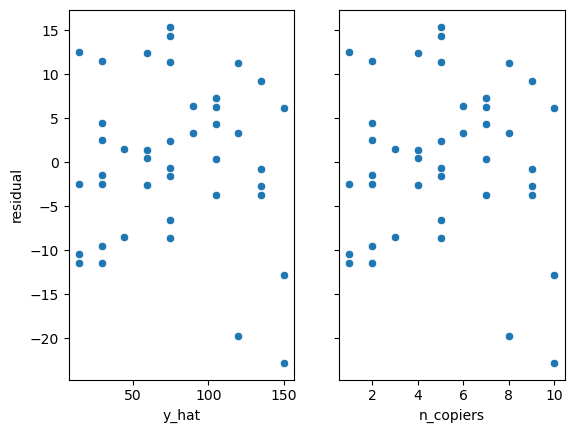

In [259]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(data=copiers, x="y_hat", y="residual", ax=ax1)
sns.scatterplot(data=copiers, x="n_copiers", y="residual", ax=ax2)

From the plots, we see a slight increase in service time residual variance at the higher end of number of copiers in a call.  The variance appears to increase at these values.  This could be due to some outliers in this area, or it could suggest we need more complexity in our regression (a quadratic model may be a better fit.)  

#### Normal Probability

Here we will make a histogram, as well as a normal probability plot (or qq-plot) to determine if the data are normally distributed.

<Axes: xlabel='n_copiers', ylabel='Count'>

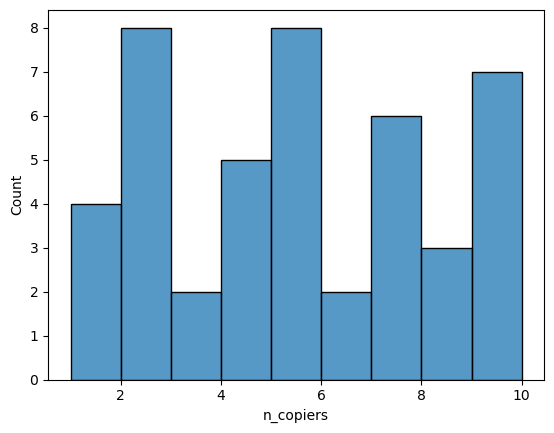

In [260]:
sns.histplot(data=copiers, x="n_copiers", binwidth=1)

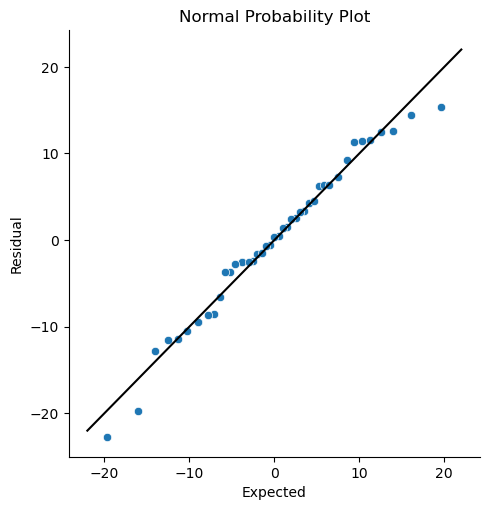

In [261]:
from scipy.stats import norm

copiers["res_rank"] = copiers["residual"].rank()
copiers["exp_normal_value"] = copier_mse**(0.5) * norm.ppf((copiers["res_rank"] - 0.375)/(copiers.shape[0] + 0.25))

identity = np.linspace(-22, 22, 100)

grid_npp = sns.FacetGrid(data=copiers, height=5)#, ylim=(0,170))
grid_npp = grid_npp.map(sns.scatterplot, data=copiers, x="exp_normal_value", y="residual", edgecolor='w')
plt.plot(identity, identity, color='black')
plt.title("Normal Probability Plot")
plt.ylabel("Residual")
plt.xlabel("Expected")
plt.show()

This plot suggests the data is approximately normal with heavier tails.

We can also check the correlation coefficient $\rho_{12}$ between the residuals and expected values under normality to test whether the residuals are normally distributed (we are testing the "linear strength" of the relationship).  The hypotheses are $$\begin{align}
H_0:&\quad\text{The residuals are normally distributed}\\
H_A:&\quad\text{The residuals are nonnormal}
\end{align}$$

In [262]:
corr_res_exp = np.corrcoef(ordered.res,ordered.exp)[0,1]
print(corr_res_exp)

0.9892079152420709


With a correlation coefficient of 0.9892 and a critical value of 0.979 ($\alpha = 0.1$) from Table B.6 in the text, we fail to reject the null hypothesis and conclude the residuals are normally distributed.

#### Correlation of Residuals

To see if there is potential correlation of the error terms in the linear regression model, we can plot the residuals against the sequential order of the data entries.

<Axes: ylabel='residual'>

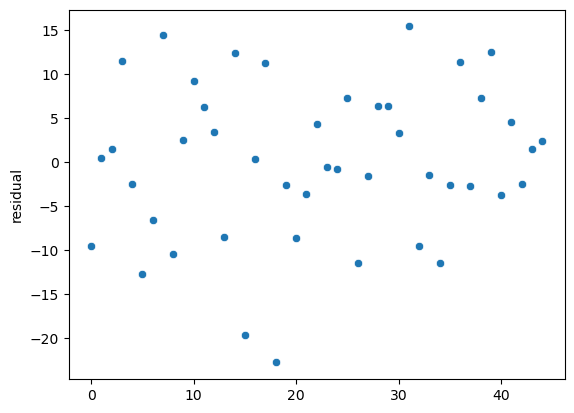

In [263]:
sns.scatterplot(data=copiers, x=copiers.index, y="residual")

There does not appear to be any systematic correlation between the error terms / residuals.

#### Test for Nonconstant Variance in Error

We shall perform a Breusch-Pagan test to determine whether variance is constant in the error terms $\epsilon_i$.  The hypotheses for this test are $$\begin{align}
H_0&:\quad \sigma_i^2\text{ is constant for all }\epsilon_i\\
H_A&:\quad \sigma_i^2\text{ is not constant}
\end{align}$$ We will use the test statistic $$\chi_{BP}^2 = \frac{SSR^*/2}{(SSE/n)^2} \sim \chi^2_{(df=1)}$$where $SSR^*$ is the regression sum of squares from the regression of $\epsilon_i^2$ on $X_i$.

In [264]:
from scipy.stats import chi2

bp_df = pd.DataFrame()
bp_df["x"] = copiers[["n_copiers"]]
bp_df["y"] = copiers["res_sq"]

res_reg = LinearRegression().fit(bp_df[["x"]], bp_df.y)

def f_err2(x_i):
    return res_reg.intercept_ + res_reg.coef_[0]*x_i

bp_df["y_hat"] = f_err2(bp_df.x)
bp_df["y_hat-y_bar"] = bp_df["y_hat"] - np.mean(bp_df["y"])
ssr_star = sum(bp_df["y_hat-y_bar"]**2)

x2_bp = (ssr_star/2)/(copier_sse/45)**2
print(f"Breusch-Pagan statistic:  {x2_bp}")
print(f"Critical value: {chi2.ppf(1-0.05, 1)}")

Breusch-Pagan statistic:  1.3146797263175305
Critical value: 3.841458820694124


We see that $\chi_{BP}^2 = 1.3147 < 3.84$, we fail to reject the null hypothesis and conclude there is no statistically significant evidence of nonconstant variance in the error terms.

### Aditional Data

Suppose we have additional data about predictors mean copier age on the call, `avg_copier_age`, and servicer experience in years, `serv_exp`, which are provided in the `CH03PR04.txt` file.  We would like to see if either of these features would provide more information if included in a regression model.

In [265]:
copiers_new = pd.read_csv("CH03PR04.txt", header=None, delimiter="\t", engine='python')
copiers_new.columns = ["time", "n_copiers", "avg_copier_age", "serv_exp"]
copiers["avg_copier_age"] = copiers_new["avg_copier_age"]
copiers["serv_exp"] = copiers_new["serv_exp"]

In [266]:
copiers.head()

,time,n_copiers,y_hat,residual,res_sq,x-x_bar,x-x_bar_sq,y_hat-y_bar,y - y_hat,y - y_bar,res_rank,exp_normal_value,avg_copier_age,serv_exp
0,20,2,29.490339,-9.490339,90.066542,-3.111111,9.679012,-46.776327,-9.490339,-56.266667,7.5,-8.957700,20,4
1,60,4,59.560836,0.439164,0.192865,-1.111111,1.234568,-16.705831,0.439164,-16.266667,24.0,0.494017,19,5
2,46,3,44.525587,1.474413,2.173892,-2.111111,4.456790,-31.741079,1.474413,-30.266667,26.0,1.488179,27,4
3,41,2,29.490339,11.509661,132.472287,-3.111111,9.679012,-46.776327,11.509661,-35.266667,41.0,11.311771,32,1
4,12,1,14.455091,-2.455091,6.027474,-4.111111,16.901235,-61.811575,-2.455091,-64.266667,18.0,-2.501266,24,4


<Axes: xlabel='serv_exp', ylabel='residual'>

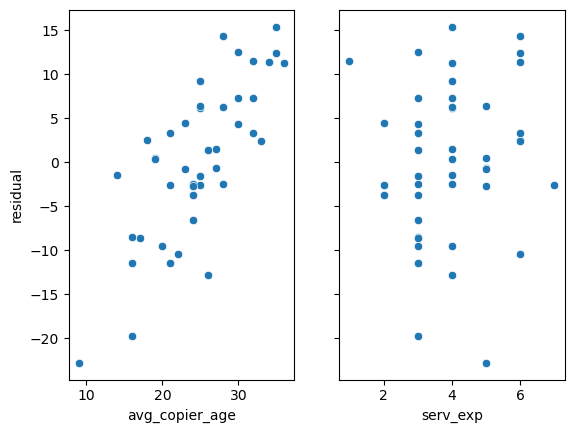

In [267]:
res_fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(data=copiers, x="avg_copier_age", y="residual", ax=ax1)
sns.scatterplot(data=copiers, x="serv_exp", y="residual", ax=ax2)

From these plots, there doesn't appear to be a relationship between servicer experience and the residuals.  However, the residuals appear to have a linear relationship with mean copier age on call, which suggests there would be some value in including this predictor in future regression models.

#### Lack of Fit

In [268]:
#copiers["n_copiers"].unique
sse_reduced = copier_sse
sse_full = 0
for j in copiers["n_copiers"].unique():
    
    y_bar_j = np.mean(copiers[copiers["n_copiers"] == j]["time"])
    sse_full += sum((copiers[copiers["n_copiers"] == j]["time"] - y_bar_j)**2)
    
print(f"SSE(R):  {sse_reduced}")
print(f"SSE(F):  {sse_full}")

SSE(R):  3416.377023498695
SSE(F):  2797.6583333333333


In [269]:
c = copiers["n_copiers"].nunique()
f_lof = ((sse_reduced - sse_full)/(c - 2)) / (sse_full/(45 - c))
print(f"Lack of fit F*:  {f_lof}")
print(f"Critical value:  {f.ppf(1 - 0.05, c - 2, 45 - c)}")

Lack of fit F*:  0.9675571306265506
Critical value:  2.216675032675201


### Simultaneous Inferences on Regression Parameters

Suppose we want simulataneous inferences on confidence intervals for $\beta_0$ and $\beta_1$.  To get 2 simultaneous 95% confidence intervals, we make a Bonferroni adjustment to the level of significance.  Instead of using $\alpha = 0.05$, we divide this by 2 to get $\alpha^* = 0.05/2 = 0.0025$ and use this in our interval constructions:

In [270]:
a_star = 0.05 / 2

s2_b0 = copier_mse / 45 + copier_mse * (np.mean(copiers["n_copiers"])**2 / sum(copiers["x-x_bar_sq"]))
s_b0 = np.sqrt(s2_b0)

lower_b0 = b_0 - t.ppf(1-a_star/2, 43) * s_b0
upper_b0 = b_0 + t.ppf(1-a_star/2, 43) * s_b0

lower_b1 = b_1 - t.ppf(1-a_star/2, 43) * s_b1
upper_b1 = b_1 + t.ppf(1-a_star/2, 43) * s_b1

print(f"Joint CI for B0: [{lower_b0}, {upper_b0}]")
print(f"Joint CI for B1: [{lower_b1}, {upper_b1}]")

Joint CI for B0: [-7.0926420194444, 5.932328703517515]
Joint CI for B1: [[13.91322076], [16.15727532]]


### No Intercept Model

Here we will fit a regression model assuming no intercept, $\beta_0$.  In many cases, having an intercept in the model doesn't make sense.  For example, if the range of the predictor allows for values less than zero, the intercept might be calculated to be negative or positive when it doesn't make sense for that particular scenario.  We will see if a no intercept model makes more sense for predicting service time from the number of copiers on a call.

In [271]:
copier_reg_noint = LinearRegression(fit_intercept=False)
copier_reg_noint.fit(copiers[["n_copiers"]], copiers["time"])
print(f"No intercept coefficients: b0 = {copier_reg_noint.intercept_},  b1={copier_reg_noint.coef_}")

No intercept coefficients: b0 = 0.0,  b1=[14.94722955]


Our new model is $Y_i = 14.9472X_i$.  We can see $\beta_1$ has changed quite a bit.  Now, let's calculate a 90% confidence interval for $\beta_1$.

In [272]:
def f_noint(x_i):
    return 14.94722955 * x_i

resids_noint = copiers["time"] - f_noint(copiers["n_copiers"])
resids_sq_noint = pow(resids_noint, 2)

mse_noint = sum(resids_sq_noint) / 44

se2_b1_noint = mse_noint / sum(pow(copiers["n_copiers"], 2))
se_b1_noint = np.sqrt(se2_b1_noint)

b1_noint = copier_reg_noint.coef_

lower_ci_b1_noint = b1_noint - t.ppf(1-0.1/2, 44) * se_b1_noint
upper_ci_b1_noint = b1_noint + t.ppf(1-0.1/2, 44) * se_b1_noint

print(f"se(b1): {se_b1_noint}")
print(f"90% CI for B1: [{lower_ci_b1_noint}, {upper_ci_b1_noint}]")

se(b1): 0.2264243039099752
90% CI for B1: [[14.56678465], [15.32767445]]


In our no intercept model, we are 90% confident that the mean service time for a call increases by between 14.567 and 15.327 minutes per additional copier.  Suppose we want to predict the service time for a new call with 6 copiers. We calculate the following:

In [273]:
se2_yhnew_6 = mse_noint * (1 + pow(6,2) / sum(pow(copiers["n_copiers"], 2)))
se_yhnew_6 = np.sqrt(se2_yhnew_6)

lower_pi_yhnew_6 = f_noint(6) - t.ppf(1 - 0.1/2, 44) * se_yhnew_6
upper_pi_yhnew_6 = f_noint(6) + t.ppf(1 - 0.1/2, 44) * se_yhnew_6

print(f"90% Prediction interval for new call of 6 copiers: [{lower_pi_yhnew_6}, {upper_pi_yhnew_6}]")

90% Prediction interval for new call of 6 copiers: [74.695586312256, 104.67116828774398]


We predict with 90% confidence that the service time for a call concerning 6 copiers will be between 74.686 and 104.671 minutes.

Let's now take a look at the plot of this regression through the origin.

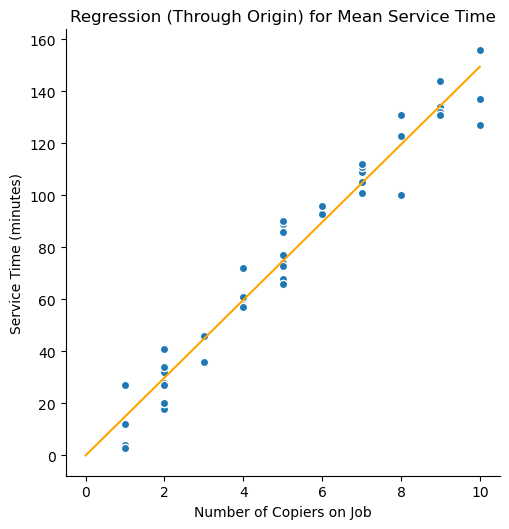

In [274]:
lin_x = np.linspace(0, 10, 100)
lin_y = b1_noint*lin_x

grid_noint = sns.FacetGrid(data=copiers, height=5)
grid_noint = grid_noint.map(plt.scatter, data=copiers, x="n_copiers", y="time", edgecolor='w')
plt.plot(lin_x, lin_y, color='orange')
plt.title("Regression (Through Origin) for Mean Service Time")
plt.ylabel("Service Time (minutes)")
plt.xlabel("Number of Copiers on Job")
plt.show()

We can see the no intercept model also appears to fit the data well.  If we take a look at the residuals for this model, we'll notice they won't sum to 0.  This is because this is not the model that minimizes the method of least squares.

In [275]:
zero_reg_df = pd.DataFrame()
zero_reg_df["n_copiers"] = copiers["n_copiers"]
zero_reg_df["time"] = copiers["time"]
zero_reg_df["residual"] = zero_reg_df["time"] - f_noint(zero_reg_df["n_copiers"])

print(f"Sum of residuals:  {sum(zero_reg_df['residual'])}")

Sum of residuals:  -5.8627964999998845


Next, let's plot the residuals against our predicted values:

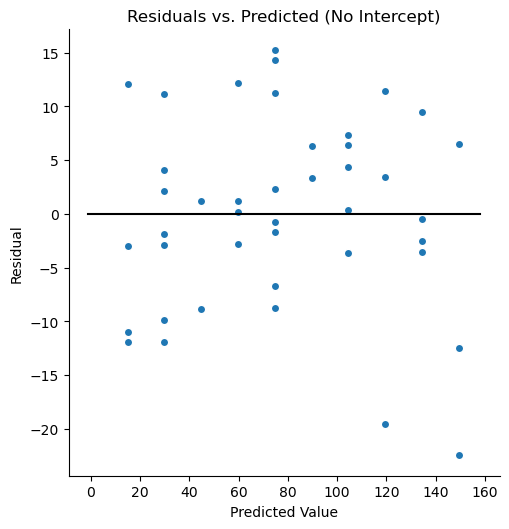

In [276]:
zero_reg_df["predicted"] = f_noint(zero_reg_df["n_copiers"])

lin_x = np.linspace(-1, np.max(zero_reg_df["time"]) + 2, 100)
lin_y = 0*lin_x

grid_noint = sns.FacetGrid(data=copiers, height=5)
grid_noint = grid_noint.map(plt.scatter, data=zero_reg_df, x="predicted", y="residual", edgecolor='w')
plt.plot(lin_x, lin_y, color='black')
plt.title("Residuals vs. Predicted (No Intercept)")
plt.ylabel("Residual")
plt.xlabel("Predicted Value")
plt.show()

From this plot, we see larger variance in service times when the predicted value in the higher portion of the range.  The residual almost suggest a quadratic model.  We shall conduct a lack of fit test.  

In [282]:
sse_reduced_noint = sum(zero_reg_df['residual']**2)
sse_full_noint = 0
for j in zero_reg_df["n_copiers"].unique():
    
    y_bar_j = np.mean(zero_reg_df[zero_reg_df["n_copiers"] == j]["time"])
    sse_full_noint += sum((zero_reg_df[zero_reg_df["n_copiers"] == j]["time"] - y_bar_j)**2)
    
print(f"SSE(R):  {sse_reduced_noint}")
print(f"SSE(F):  {sse_full_noint}")

c = zero_reg_df["n_copiers"].nunique()
f_lof_noint = ((sse_reduced_noint - sse_full_noint)/(c - 1)) / (sse_full_noint/(45 - c))
print(f"Lack of fit F*:  {f_lof_noint}")
print(f"p-value       :  {1 - f.cdf(f_lof_noint, c-1, 45-c)}")
print(f"Critical value:  {f.ppf(1 - 0.05, c - 1, 45 - c)}")

SSE(R):  3419.7783641160954
SSE(F):  2797.6583333333333
Lack of fit F*:  0.8647788210734444
p-value       :  0.5644335952447055
Critical value:  2.1608292507665317


With our $F$-statistic and critical value, we would conclude that the model fits the data adequately.  However, the $p$-value here suggests this is a weak conclusion in this instance.

Suppose we want to estimate the expected number of service minutes when the number of copiers is 3, 5, or 7.  We do that as follows:

In [290]:
def s2_Y_h(x_h):
    return copier_mse * (1/45 + (pow(x_h - np.mean(copiers["n_copiers"]),2)/sum(copiers["x-x_bar_sq"])))

w = np.sqrt(2 * f.ppf(1-0.1, 2, 43))
print(f"F:  {f.ppf(1-0.1, 2, 43)}")
print(f"W:  {w}")

y_3 = b_0 + b_1*3
y_5 = b_0 + b_1*5
y_7 = b_0 + b_1*7

lower_3 = y_3 - w * np.sqrt(s2_Y_h(3))
upper_3 = y_3 + w * np.sqrt(s2_Y_h(3))

lower_5 = y_5 - w * np.sqrt(s2_Y_h(5))
upper_5 = y_5 + w * np.sqrt(s2_Y_h(5))

lower_7 = y_7 - w * np.sqrt(s2_Y_h(7))
upper_7 = y_7 + w * np.sqrt(s2_Y_h(7))

print(f"Estimate for X_h=3 :  {y_3[0]} w/ [{lower_3[0]}, {upper_3[0]}]")
print(f"Estimate for X_h=5 :  {y_5[0]} w/ [{lower_5[0]}, {upper_5[0]}]")
print(f"Estimate for X_h=7 :  {y_7[0]} w/ [{lower_7[0]}, {upper_7[0]}]")

F:  2.430407155251737
W:  2.204725450141916
Estimate for X_h=3 :  44.525587467362925 w/ [40.83264591916755, 48.2185290155583]
Estimate for X_h=5 :  74.59608355091385 w/ [71.66417114835387, 77.52799595347382]
Estimate for X_h=7 :  104.66657963446475 w/ [101.11278224435272, 108.22037702457679]


In [291]:
np.sqrt(0.9)

0.9486832980505138

In [292]:
def s2_pred(x_h):
    return copier_mse + s2_Y_h(x_h)

y_4 = b_0 + b_1*4
y_7 = b_0 + b_1*7

g = 2  # Number of simultaneuous inferences

schaffe_s = np.sqrt(g * f.ppf(1-0.1, g, 45 - 2))
bonferroni_t = t.ppf(1 - 0.1/(2*g), 45-3)

print(f"S: {schaffe_s}")
print(f"t: {bonferroni_t}")

S: 2.204725450141916
t: 2.018081697095881


In [293]:
lower_pi_4 = y_4 - bonferroni_t * np.sqrt(s2_pred(4))
upper_pi_4 = y_4 + bonferroni_t * np.sqrt(s2_pred(4))

lower_pi_7 = y_7 - bonferroni_t * np.sqrt(s2_pred(7))
upper_pi_7 = y_7 + bonferroni_t * np.sqrt(s2_pred(7))

print(f"PI for X_h=4:  [{lower_pi_4[0]}, {upper_pi_4[0]}]")
print(f"PI for X_h=7:  [{lower_pi_7[0]}, {upper_pi_7[0]}]")

PI for X_h=4:  [41.341646578747586, 77.78002443952919]
PI for X_h=7:  [86.38663000760333, 122.94652926132618]
